<img src="images/JHI_STRAP_Web.png" style="width: 150px; float: right;">
# XX - Runthrough

<div class="alert-danger">
<b>This is essentially a crib sheet for the tutor.
<p></p>
The plan is that this document shows on the tutor's screen only, and the tutor talks the class through generation of a similar document in the main session itself.</b>
</div>

* **Reinforce the value of reproducible research, and literate programming (embedding runnable code and analysis in the same document)**
* **Ask the learners to write a short introduction about the goals of the report**

## 00 - Python Imports

You'll need the following imports:

In [1]:
# Show graphics inline
%pylab inline

# Show images inline
from IPython.display import Image

# PSL
import io
import os

# Import Pandas and Seaborn
import pandas as pd
import seaborn as sns

# Biopython
from Bio import SeqIO
from Bio.Blast import NCBIWWW
from Bio.Blast.Applications import NcbiblastxCommandline, NcbiblastnCommandline, \
                                   NcbitblastnCommandline, NcbitblastxCommandline
from Bio.KEGG import REST
from Bio.SeqRecord import SeqRecord
    
# bioservices
from bioservices import UniProt

Populating the interactive namespace from numpy and matplotlib


Also to make an output directory - creation at the command-line is OK.

In [2]:
# Create output directory if needed
os.makedirs("output", exist_ok=True)

## 01 - Mapping/searching for CDS on a genome

### 01a - Load in the sequences

* **The downstream analyses require us to have the sequences available**
* **Ask learners to write a little summary of sequence source information**

<div class="alert-success">
The nucleotide sequences for wildtype (`wildtype`) and engineered (`engineered`) lipases as provided by the Product Development Unit are loaded.
</div>

In [3]:
# Read the wildtype and engineered sequences in from file
wildtype = SeqIO.read(os.path.join('data', 'wildtype_nt.fasta'), 'fasta')
engineered = SeqIO.read(os.path.join('data', 'engineered_nt.fasta'), 'fasta')

# Show the sequences
print(wildtype.format('fasta'))
print(engineered.format('fasta'))

>wildtype lipase protein from Proteus mirabilis
ATGAGCACCAAGTACCCCATCGTGCTGGTGCACGGCCTGGCCGGCTTCAACGAGATCGTG
GGCTTCCCCTACTTCTACGGCATCGCCGACGCCCTGAGGCAGGACGGCCACCAGGTGTTC
ACCGCCAGCCTGAGCGCCTTCAACAGCAACGAGGTGAGGGGCAAGCAGCTGTGGCAGTTC
GTGCAGACCCTGCTGCAGGAGACCCAGGCCAAGAAGGTGAACTTCATCGGCCACAGCCAG
GGCCCCCTGGCCTGCAGGTACGTGGCCGCCAACTACCCCGACAGCGTGGCCAGCGTGACC
AGCATCAACGGCGTGAACCACGGCAGCGAGATCGCCGACCTGTACAGGAGGATCATGAGG
AAGGACAGCATCCCCGAGTACATCGTGGAGAAGGTGCTGAACGCCTTCGGCACCATCATC
AGCACCTTCAGCGGCCACAGGGGCGACCCCCAGGACGCCATCGCCGCCCTGGAGAGCCTG
ACCACCGAGCAGGTGACCGAGTTCAACAACAAGTACCCCCAGGCCCTGCCCAAGACCCCC
GGCGGCGAGGGCGACGAGATCGTGAACGGCGTGCACTACTACTGCTTCGGCAGCTACATC
CAGGGCCTGATCGCCGGCGAGAAGGGCAACCTGCTGGACCCCACCCACGCCGCCATGAGG
GTGCTGAACACCTTCTTCACCGAGAAGCAGAACGACGGCCTGGTGGGCAGGAGCAGCATG
AGGCTGGGCAAGCTGATCAAGGACGACTACGCCCAGGACCACATCGACATGGTGAACCAG
GTGGCCGGCCTGGTGGGCTACAACGAGGACATCGTGGCCATCTACACCCAGCACGCCAAG
TACCTGGCCAGCAAGCAGCTG

>engineered lipase protein from Proteus mirabilis
ATGAGCACCAAGTACCCCATCGTGC

In [4]:
# Summarise sequence properties
# Lengths
print("lengths - WT: {0}nt, ENG: {1}nt".format(len(wildtype), len(engineered)))

lengths - WT: 861nt, ENG: 861nt


In [5]:
# Count and report differences between the sequences (OPTIONAL)
diffcount = 0
for pos in range(len(wildtype)):
    if engineered[pos] != wildtype[pos]:
        diffcount += 1
print("Count of differing bases: {0}".format(diffcount))

Count of differing bases: 18


<div class="alert-success">
The wildtype and engineered sequences are each 921bp in length, with 18 SNPs that distinguish the engineered form.
</div>

* **Convert nucleotide sequences to protein (use table 11)**
* **Note that sequence IDs can't have spaces**
* **Ask learners to write sequences to file**
* **Ask learners to write short summary of conversion process**

<div class="alert-success">
The nucleotide sequences are translated into predicted gene products using the `Biopython` `translate()` method, with translation table 11 (bacteria, archaea, plant plastid). 
</div>

In [6]:
# Translate input nucleotide sequences
wildtype_aa = SeqRecord(id="translated_" + wildtype.id,
                        description=wildtype.description,
                        seq = wildtype.seq.translate(table=11))
engineered_aa = SeqRecord(id="translated_" + engineered.id,
                        description=engineered.description,
                        seq = engineered.seq.translate(table=11))

# Show the sequences
print(wildtype_aa.format('fasta'))
print(engineered_aa.format('fasta'))

>translated_wildtype wildtype lipase protein from Proteus mirabilis
MSTKYPIVLVHGLAGFNEIVGFPYFYGIADALRQDGHQVFTASLSAFNSNEVRGKQLWQF
VQTLLQETQAKKVNFIGHSQGPLACRYVAANYPDSVASVTSINGVNHGSEIADLYRRIMR
KDSIPEYIVEKVLNAFGTIISTFSGHRGDPQDAIAALESLTTEQVTEFNNKYPQALPKTP
GGEGDEIVNGVHYYCFGSYIQGLIAGEKGNLLDPTHAAMRVLNTFFTEKQNDGLVGRSSM
RLGKLIKDDYAQDHIDMVNQVAGLVGYNEDIVAIYTQHAKYLASKQL

>translated_engineered engineered lipase protein from Proteus mirabilis
MSTKYPIVLVHGLAGFSEIVGFPYFYGIADALTQDGHQVFTASLSAFNSNEVRGKQLWQF
VQTILQETQTKKVNFIGHSQGPLACRYVAANYPDSVASVTSINGVNHGSEIADLYRRIIR
KDSIPEYIVEKVLNAFGTIISTFSGHRGDPQDAIAALESLTTEQVTEFNNKYPQALPKTP
CGEGDEIVNGVHYYCFGSYIQELIAGENGNLLDPTHAAMRVLNTLFTEKQNDGLVGRCSM
RLGKLIKDDYAQDHFDMVNQVAGLVSYNENIVAIYTLHAKYLASKQL



In [7]:
# Summarise sequence properties
# Lengths
print("lengths - WT: {0}aa, ENG: {1}aa".format(len(wildtype_aa), len(engineered_aa)))

lengths - WT: 287aa, ENG: 287aa


In [8]:
# Count and report differences between the sequences (OPTIONAL)
diffcount = 0
for pos in range(len(wildtype_aa)):
    if engineered_aa[pos] != wildtype_aa[pos]:
        diffcount += 1
print("Count of differing residues: {0}".format(diffcount))

Count of differing residues: 14


In [9]:
# Write sequences to file
SeqIO.write(wildtype_aa, os.path.join("output", "wildtype_aa.fasta"), "fasta")
SeqIO.write(engineered_aa, os.path.join("output", "engineered_aa.fasta"), "fasta")

1

<div class="alert-success">
This produces conceptual translations of 307aa in length, with 14 residue substitutions between wild-type and engineered forms. These sequences were written to `output/wildtype_aa.fasta` and `output/engineered_aa.fasta`.
</div>

## 01b - Identifying a gene model

* **The wildtype nt sequence will be `BLAST`ed against the genome to identify a likely location; this will be visualised against the `.gbff` file for the reference.**
* **Ask the learners to search for the wildtype sequence on the genome.**
* **Allow the learners to use the command-line or notebook to conduct the search**
* **In either case, the first step is database creation, which requires dropping to the command-line**

<div class="alert-success">
The following local `BLAST` databases of the <i>P. mirabilis</i> reference genome are created in the `output` directory, with the names:
<ul>
    <li> The reference genome sequence (nucleotide) - `ref_genome`
    <li> The reference annotated CDS (nucleotide) - `ref_cds`
    <li> The reference annotated proteins (protein) - `ref_protein`
</ul>
</div>

In [10]:
%%bash
# Drop out to bash to create BLAST databases - can do this at the command line

# reference genome
makeblastdb -in data/GCA_000069965.1_ASM6996v1_genomic.fna \
            -dbtype nucl \
            -title ref_genome \
            -out output/ref_genome
            
# reference CDS            
makeblastdb -in data/GCA_000069965.1_ASM6996v1_cds_from_genomic.fna \
            -dbtype nucl \
            -title ref_cds \
            -out output/ref_cds
            
# reference protein
makeblastdb -in data/GCA_000069965.1_ASM6996v1_protein.faa \
            -dbtype prot \
            -title ref_protein \
            -out output/ref_protein



Building a new DB, current time: 03/13/2017 17:18:14
New DB name:   /Users/lpritc/Documents/Development/Teaching/Teaching-IBioIC-Intro-to-Bioinformatics/03-lipases/output/ref_genome
New DB title:  ref_genome
Sequence type: Nucleotide
Deleted existing Nucleotide BLAST database named /Users/lpritc/Documents/Development/Teaching/Teaching-IBioIC-Intro-to-Bioinformatics/03-lipases/output/ref_genome
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 2 sequences in 0.054251 seconds.


Building a new DB, current time: 03/13/2017 17:18:14
New DB name:   /Users/lpritc/Documents/Development/Teaching/Teaching-IBioIC-Intro-to-Bioinformatics/03-lipases/output/ref_cds
New DB title:  ref_cds
Sequence type: Nucleotide
Deleted existing Nucleotide BLAST database named /Users/lpritc/Documents/Development/Teaching/Teaching-IBioIC-Intro-to-Bioinformatics/03-lipases/output/ref_cds
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 3740 sequences in 

* **However the BLAST search is run, note the utility of having an informative output filename**

<div class="alert-success">
A `BLASTN` search using the wildtype sequence as query was carried out against the `ref_genome` database to identify a likely genomic location.
</div>

**Option 1: command-line search**

In [11]:
%%bash
# Command-line search
blastn -query data/wildtype_nt.fasta \
       -db output/ref_genome \
       -outfmt 6 \
       -out output/wildtype_blastn_ref_genome.tab

**Option 2: notebook search**

In [12]:
# Create BLASTN command line
cmd_blastn = NcbiblastnCommandline(query=os.path.join("data", "wildtype_nt.fasta"),
                                   db=os.path.join("output", "ref_genome"),
                                   outfmt=6,
                                   out=os.path.join("output", "wildtype_blastn_ref_genome.tab"))

# Run BLASTN command
stdout, stderr = cmd_blastn()
print("STDOUT: %s" % stdout)
print("STDERR: %s" % stderr)

STDOUT: 
STDERR: 


* **Check the output file. This search provides no matches!**
* **Ask the learners to consider a different approach - guide them towards `TBLASTX` (translated query, translated subject)**

<div class="alert-success">
As the `BLASTN` search produced no matches, a `TBLASTX` search was used, with the same input sequence and database.
</div>

**Option 1: command-line search**

In [13]:
%%bash
# Command-line search
tblastx -query data/wildtype_nt.fasta \
        -db output/ref_genome \
        -outfmt 6 \
        -out output/wildtype_tblastx_ref_genome.tab

**Option 2: notebook search**

In [14]:
# Create TBLASTX command line
cmd_tblastx = NcbitblastxCommandline(query=os.path.join("data", "wildtype_nt.fasta"),
                                    db=os.path.join("output", "ref_genome"),
                                    outfmt=6,
                                    out=os.path.join("output", "wildtype_tblastx_ref_genome.tab"))

# Run BLASTN command
stdout, stderr = cmd_tblastx()
print("STDOUT: %s" % stdout)
print("STDERR: %s" % stderr)

STDOUT: 
STDERR: 


* **Ask the learners to read in the output file using `pandas`, and present the matches with appropriate headers and a comment.**

In [15]:
# Define column headers
headers = ['query', 'subject',
           'pc_identity', 'aln_length', 'mismatches', 'gaps_opened',
           'query_start', 'query_end', 'subject_start', 'subject_end',
           'e_value', 'bitscore']

# Read TBLASTX output and add headers
results = pd.read_csv(os.path.join("output", "wildtype_tblastx_ref_genome.tab"), sep="\t", header=None)
results.columns = headers

# Show results
results

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,wildtype,AM942759.1,100.000,287,0,0,1,861,1063081,1063941,0.000000e+00,686.0
1,wildtype,AM942759.1,70.769,130,38,0,692,303,1063772,1063383,2.610000e-90,197.0
2,wildtype,AM942759.1,72.289,83,23,0,254,6,1063334,1063086,2.610000e-90,121.0
3,wildtype,AM942759.1,80.769,26,5,0,860,783,1063940,1063863,2.610000e-90,48.3
4,wildtype,AM942759.1,80.000,10,2,0,16,45,588332,588303,3.500000e-01,23.1
5,wildtype,AM942759.1,35.294,34,22,0,142,243,588212,588111,3.500000e-01,23.1
6,wildtype,AM942759.1,38.889,36,22,0,178,285,3623411,3623304,9.000000e-01,29.5
7,wildtype,AM942759.1,43.478,23,13,0,727,795,1102334,1102402,9.000000e-01,29.5
8,wildtype,AM942759.1,52.381,21,10,0,226,288,3298352,3298414,9.000000e-01,29.5
9,wildtype,AM942759.1,66.667,12,4,0,470,435,3695049,3695084,3.200000e+00,27.6


<div class="alert-success">
This query produced a number of candidate genomic region matches. The best match was to the region 1063060-1063941, covering 294 amino acids, at 98.6% identity. This match was taken to be the most likely genomic location for the wildtype sequence.
</div>

* **Ask the learners to search the annotated proteins from the reference, as for the genome search, and summarise the results in a similar way.**

<div class="alert-success">
A `BLASTX` search using the wildtype sequence as query was carried out against the `ref_protein` database to identify whether a corresponding protein has been annotated on the reference.
</div>

**Option 1: command-line search**

In [16]:
%%bash
# Command-line search
blastx -query data/wildtype_nt.fasta \
       -db output/ref_protein \
       -outfmt 6 \
       -out output/wildtype_blastx_ref_protein.tab

**Option 2: notebook search**

In [17]:
# Create BLASTX command line
cmd_blastx = NcbiblastxCommandline(query=os.path.join("data", "wildtype_nt.fasta"),
                                   db=os.path.join("output", "ref_protein"),
                                   outfmt=6,
                                   out=os.path.join("output", "wildtype_blastx_ref_protein.tab"))

# Run BLASTN command
stdout, stderr = cmd_blastx()
print("STDOUT: %s" % stdout)
print("STDERR: %s" % stderr)

STDOUT: 
STDERR: 


* **Remind the learners that they can reuse the headers they defined earlier, when presenting the results as a `pandas` dataframe**

In [18]:
# Read TBLASTX output and add headers
results = pd.read_csv(os.path.join("output", "wildtype_blastx_ref_protein.tab"), sep="\t", header=None)
results.columns = headers

# Show results
results

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,wildtype,CAR42190.1,100.000,287,0,0,1,861,1,287,0.00,596.0
1,wildtype,CAR41317.1,29.412,102,62,3,16,309,23,118,0.47,28.5
2,wildtype,CAR42262.1,43.478,23,13,0,727,795,191,213,0.98,27.7
3,wildtype,CAR46496.1,24.503,151,93,4,382,798,91,232,1.20,27.3
4,wildtype,CAR45487.1,31.915,47,32,0,235,375,131,177,1.70,26.6
5,wildtype,CAR46650.1,33.333,33,22,0,506,408,529,561,3.60,25.8
6,wildtype,CAR42804.1,30.233,43,25,1,700,813,21,63,3.90,23.9


<div class="alert-success">
The `BLASTX` search showed similarity of the wildtype sequence to seven candidate proteins, but only one candidate, `CAR42190.1`, had more than 30% sequence identity over a considerable part of the sequence.
</div>

## 01c - Identifying a putative regulatory region

To identify a putative regulatory region, the reference genome is inspected in the region of the `TBLASTX` hit and annotated location of `CAR42190.1`, and the region immediately upstream of the operon containing this location extracted as a nucleotide sequence in FASTA format.

* **Ask the learners to start `Artemis` (at the command-line)**
* **Ask the learners to load the `data/GCA_000069965.1_ASM6996v1_genomic.gbk` file and navigate to the region of the `TBLASTX` match.**

![Artemis region match](images/XX-01_region.png)

* **Ask the learners to get information about the annotated feature immediately downstream (this is `PMI0999`, and is their `BLASTX` hit). Note that this is confirmation of the `BLASTX` result.**

![Artemis feature](images/XX-02_feature.png)

* **Ask the learners to select the genomic region on the forward strand between the two features `PMI0998` and `PMI0999`: `1062938..1063081`**

![Artemis selection](images/XX-03_select.png)

* **Ask the learners to write that sequence out to `output/putative_regulatory_region.fasta`.**

![Artemis menu](images/XX-04_menu.png)
![Artemis write](images/XX-05_write.png)

* **Ask learners to write up their work.**

<p></p>
<div class="alert-success">
The region of the `TBLASTX` match was inspected using `Artemis` and found to include the region annotated with `PMI0999`/`CAR42190`, the hit identified by `BLASTX`. The intergenic region upstream of `PMI0999` was extracted as a FASTA sequence file in `output/putative_regulatory_region.fasta`.
</div>

## 02 - Identifying homologues in public databases

### 02a - BLAST/NCBI

The first thing to do is query nr with our wildtype protein sequence, using `BLASTP`. This will be done remotely, and can be done from the notebook or through the web browser. The web browser seems to run *much* faster, in testing.

* **Ask the learners to submit the `wildtype_aa.fasta` sequence as a query against the remote `nr` database, restricting their query to `Proteus` (this will save some time)**
* **Remind learners that the `wildtype_aa` sequence is still in memory, so they can use that**
* **Even restricting to `Proteus`, the remote search will take a couple of minutes - use this to write up the notes**
* **QBLAST is as slow as sin, but it looks like the NCBI cache queries and their results, so run this notebook just ahead of the session**
* **The web browser option will give an alignment file almost immediately, and is probably the safe route to take when presenting the material**

<div class="alert-success">
The translated wildtype sequence was used as a remote `BLASTP` query against the `nr` database at NCBI. The query was restricted to organisms in the Genus *Proteus*.
</div>

* **Option 1: In the notebook**

In [19]:
# Submit wildtype_aa query sequence to NCBI nr BLASTP, restricting
# to enterobacteriales
result_handle = NCBIWWW.qblast("blastp", "nr", wildtype_aa.format("fasta"),
                               entrez_query="proteus[ORGN]",
                               format_type="Text")

In [20]:
# Get human-readable results
output = result_handle.read()

# Show result
print(output)

# Save output to file
outfilename = os.path.join("output", "wildtype_remote_blastp_nr.txt")
with open(outfilename, 'w') as outfh:
    outfh.write(output)

<p><!--
QBlastInfoBegin
	Status=READY
QBlastInfoEnd
--><p>
<PRE>
BLASTP 2.6.1+
Reference: Stephen F. Altschul, Thomas L. Madden, Alejandro
A. Schaffer, Jinghui Zhang, Zheng Zhang, Webb Miller, and
David J. Lipman (1997), "Gapped BLAST and PSI-BLAST: a new
generation of protein database search programs", Nucleic
Acids Res. 25:3389-3402.


Reference for compositional score matrix adjustment: Stephen
F. Altschul, John C. Wootton, E. Michael Gertz, Richa
Agarwala, Aleksandr Morgulis, Alejandro A. Schaffer, and
Yi-Kuo Yu (2005) "Protein database searches using
compositionally adjusted substitution matrices", FEBS J.
272:5101-5109.


RID: CDN3AE62013


Database: All non-redundant GenBank CDS
translations+PDB+SwissProt+PIR+PRF excluding environmental samples
from WGS projects
           115,570,790 sequences; 42,364,384,627 total letters
Query= translated_wildtype wildtype lipase protein from Proteus mirabilis

Length=287


                                                                   Sc

* **Option 2: in the browser**

* Upload the `output/wildtype_aa.fasta` sequence
* Select `nr`
* Put the term `proteus[ORGN]` into the `Entrez query` field
* Submit

The results will come back graphically in a couple of minutes

* The search returns 22 matches
  * Click on `Download -> Download alignment -> Text` to download the plain text results
  * Click on `Download -> Download alignment -> Table(csv)` to download tabular results
* Click on `Multiple alignment` to see an alignment
  * Click on `Download -> Download alignment -> FASTA plus gaps` (this will go in the Downloads directory)
* Click on `MSA viewer` to see the MSA
* Click on `Tools -> Coloring -> Rasmol amino acid colors` to see differences highlighted.

<p></p>
* **Ask the learners to move the downloaded files to the `output` directory**
* **NOTE: the source structures are two of the hits recovered in the alignment. You can point this out if you like.**

### 02b - UniProt

We can query UniProt in the browser or from the notebook. We have a match from the local reference genome that is 100% identity over the entire sequence, so we can be confident that the functional annotation is for the wildtype protein.

<div class="alert-success">
The `PMI0999` sequence obtained in the `BLAST` search is identifcal to the wildtype, so this accession was used as a query against `UniProt` to identify database cross-links and functional information.
</div>

**Option 1: in the browser**

* **Ask the learners to enter `PMI0999` as a query at the `UniProt` home page**
* **Ask the learners to obtain the mappings of this entry to `GenBank`, `KEGG` (and `KO`), `PFam`, `Ensembl`, `STRING`, and `PDB`, if available**


* **Option 2: in the notebook**

* **Ask the learners to use `PMI0999` as a query for `UniProt` to identify the entry accession**

In [21]:
# Make a link to the UniProt webservice
service = UniProt()

# Make a new query string, and run a remote search at UniProt
new_query = "PMI0999"
new_result = service.search(new_query)

# Inspect the result
print(new_result)

Entry	Entry name	Status	Protein names	Gene names	Organism	Length
B4EVM3	B4EVM3_PROMH	unreviewed	Putative lipase (EC 3.1.1.3)	PMI0999	Proteus mirabilis (strain HI4320)	287



* **Ask the learners to obtain the `pandas` dataframe result for this accession**

In [22]:
# Get a dataframe for a single accession ID
df = service.get_df('B4EVM3')

# View the dataframe
df.head()

,Entry,Entry name,Gene names,Gene names (primary ),Gene names (synonym ),Gene names (ordered locus ),Gene names (ORF ),Organism,Organism ID,Protein names,...,Miscellaneous [CC],Keywords,Protein existence,Status,Sequence annotation (Features),Protein families,Version,Comments,Cross-reference,Pathway.1
0,B4EVM3,B4EVM3_PROMH,[PMI0999],NaN,NaN,PMI0999,NaN,Proteus mirabilis (strain HI4320),529507,Putative lipase (EC 3.1.1.3),...,NaN,"[3D-structure, Calcium, Complete proteome, Hyd...",Evidence at protein level,unreviewed,NaN,[],53,[],NaN,NaN


In [23]:
# Use the mapping() method of the bioservices service to obtain database cross-references
# See also http://www.uniprot.org/help/programmatic_access
entry = "B4EVM3"
kegg_links = service.mapping("ACC", "KEGG_ID", entry)
kegg_ko_links = service.mapping("ACC", "KO_ID", entry)
ensembl_protein_links = service.mapping("ACC", "ENSEMBLGENOME_PRO_ID", entry)
ensembl_transcript_links = service.mapping("ACC", "ENSEMBLGENOME_TRS_ID", entry)
string_links =service.mapping("ACC", "STRING_ID", entry)
genbank_links = service.mapping("ACC", "EMBL_ID", entry)
pdb_links = service.mapping("ACC", "PDB_ID", entry)
orthodb_links = service.mapping("ACC", "ORTHODB_ID", entry)

# Print links
print("KEGG: {0}".format(kegg_links))
print("KEGG KO: {0}".format(kegg_ko_links))
print("Ensembl Protein: {0}".format(ensembl_protein_links))
print("Ensembl Transcript: {0}".format(ensembl_transcript_links))
print("STRING: {0}".format(string_links))
print("GENBANK: {0}".format(genbank_links))
print("PDB: {0}".format(pdb_links))
print("OrthoDB: {0}".format(orthodb_links))

KEGG: defaultdict(<class 'list'>, {'B4EVM3': ['pmr:PMI0999']})
KEGG KO: defaultdict(<class 'list'>, {'B4EVM3': ['K01046']})
Ensembl Protein: defaultdict(<class 'list'>, {'B4EVM3': ['CAR42190']})
Ensembl Transcript: defaultdict(<class 'list'>, {'B4EVM3': ['CAR42190']})
STRING: defaultdict(<class 'list'>, {'B4EVM3': ['529507.PMI0999']})
GENBANK: defaultdict(<class 'list'>, {'B4EVM3': ['AM942759']})
PDB: defaultdict(<class 'list'>, {'B4EVM3': ['3W9U', '4GW3']})
OrthoDB: defaultdict(<class 'list'>, {'B4EVM3': ['POG091H09SQ']})


<div class="alert-success">
The `PMI0999` accession corresponds to `UniProt` entry `B4EVM3`, an unreviewed putative lipase from *Proteus mirabilis*. Database crossreferences include:
<ul>
  <li> `GenBank`: CAR42190.1; AM942759
  <li> `KEGG`: pmr:PMI0999
  <li> `KEGG KO`: pmr:K01046  
  <li> `Ensembl Protein`: CAR42190
  <li> `Ensembl Transcript`: CAR42190
  <li> `PFam`: PF00561 (Abhydrolase_1)
  <li> `Ensembl`: CAR42190; PMI0999
  <li> `STRING`: 529507.PMI0999
  <li> `PDB`: 2W9U, 4GW3
  <li> `OrthoDB`: POG091H09SQ
</ul>
<p></p>
There appears to be a significant amount of functional annotation available in the public databases.
</div>

### 02c - KEGG

From the database cross-references above, we can get information on `KEGG` orthologues (for an alignment) and any pathways the sequence is involved in.

* **Ask the learners to identify any pathways the wildtype sequence is involved in, and obtain an image of the map(s) for *Proteus mirabilis*.**

<p></p>
<div class="alert-success">
The sequence identifier `PMI0999` is used as a query against the KEGG databases to identify this gene's role in normal metabolism.
</div>

**Option 1: in the browser**

* Go to the KEGG home page
* Go to the GENES database
* Enter PMI0999 as a search term and click on the single match
* There are two PATHWAY links

```
pmr00561             Glycerolipid metabolism - Proteus mirabilis HI4320 
pmr01100             Metabolic pathways - Proteus mirabilis HI4320 
```

* Follow the links and download the maps (download requires right-clicking).

**Option 2: in the notebook**

We define a function to help with processing output

In [24]:
# Some code to return a Pandas dataframe, given tabular text
def to_df(result):
    return pd.read_table(io.StringIO(result), header=None)

In [25]:
# Find KEGG GENES results for the entry
result = REST.kegg_find("genes", "PMI0999").read()
to_df(result)

,0,1
0,pmr:PMI0999,K01046 triacylglycerol lipase [EC:3.1.1.3] | (...


In [26]:
# Get KEGG GENES entry
result = REST.kegg_get("pmr:PMI0999").read()
print(result)

ENTRY       PMI0999           CDS       T00753
DEFINITION  (GenBank) putative lipase
ORTHOLOGY   K01046  triacylglycerol lipase [EC:3.1.1.3]
ORGANISM    pmr  Proteus mirabilis HI4320
PATHWAY     pmr00561  Glycerolipid metabolism
            pmr01100  Metabolic pathways
BRITE       KEGG Orthology (KO) [BR:pmr00001]
             Metabolism
              Lipid metabolism
               00561 Glycerolipid metabolism
                PMI0999
            Enzymes [BR:pmr01000]
             3. Hydrolases
              3.1  Acting on ester bonds
               3.1.1  Carboxylic-ester hydrolases
                3.1.1.3  triacylglycerol lipase
                 PMI0999
POSITION    1063081..1063944
MOTIF       Pfam: Abhydrolase_1 DUF676 DUF915 Lipase_2 BAAT_C Hydrolase_4 FliG_N
DBLINKS     NCBI-ProteinID: CAR42190
            UniProt: B4EVM3
STRUCTURE   PDB: 4HS9 3W9U 4GW3 4GXN
AASEQ       287
            MSTKYPIVLVHGLAGFNEIVGFPYFYGIADALRQDGHQVFTASLSAFNSNEVRGKQLWQF
            VQTLLQETQAKKVNFIGHSQGP

In [27]:
# Get PATHWAY entries for the GENES entry
result = REST.kegg_link("pathway", "pmr:PMI0999").read()
to_df(result)

,0,1
0,pmr:PMI0999,path:pmr00561
1,pmr:PMI0999,path:pmr01100


ENTRY       pmr00561                    Pathway
NAME        Glycerolipid metabolism - Proteus mirabilis HI4320
CLASS       Metabolism; Lipid metabolism
PATHWAY_MAP pmr00561  Glycerolipid metabolism
DBLINKS     BSID: 73017
            GO: 0045017 0046486 0046503
ORGANISM    Proteus mirabilis HI4320 [GN:pmr]
GENE        PMI3609  garK; glycerate kinase [KO:K00865] [EC:2.7.1.165]
            PMI2402  dhaK; PTS-dependent dihydroxyacetone kinase, dihydroxyacetone-binding subunit [KO:K05878] [EC:2.7.1.-]
            PMI1231  dhaK1; dihydroxyacetone kinase (glycerone kinase), kinase subunit [KO:K05878] [EC:2.7.1.-]
            PMI1232  dhaK2; dihydroxyacetone kinase, phosphatase subunit [KO:K05879] [EC:2.7.1.-]
            PMI2403  dhaL; PTS-dependent dihydroxyacetone kinase, ADP-binding subunit [KO:K05879] [EC:2.7.1.-]
            PMI3595  gldA; glycerol dehydrogenase [KO:K00005] [EC:1.1.1.6]
            PMI2766  putative glycerol dehydrogenase [KO:K00005] [EC:1.1.1.6]
            PMI3210  gl

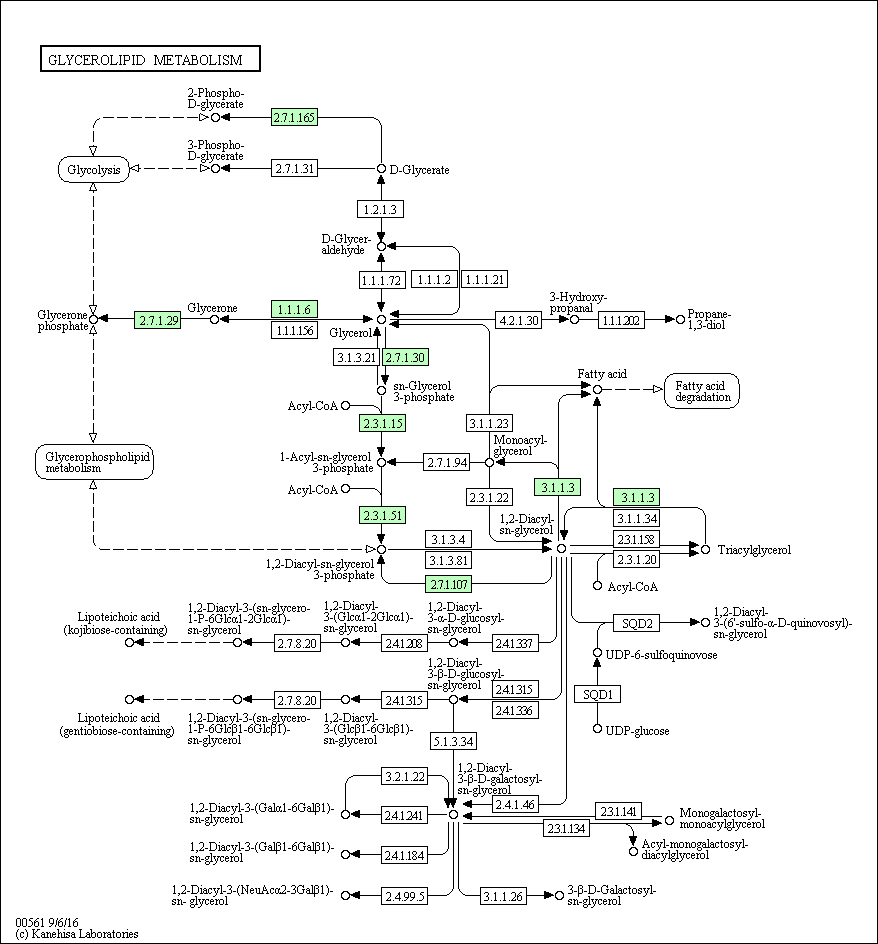

In [28]:
# Get the image for each path
pathway1img = REST.kegg_get("pmr00561", "image").read()
pathway1txt = REST.kegg_get("pmr00561").read()
print(pathway1txt)
Image(pathway1img)

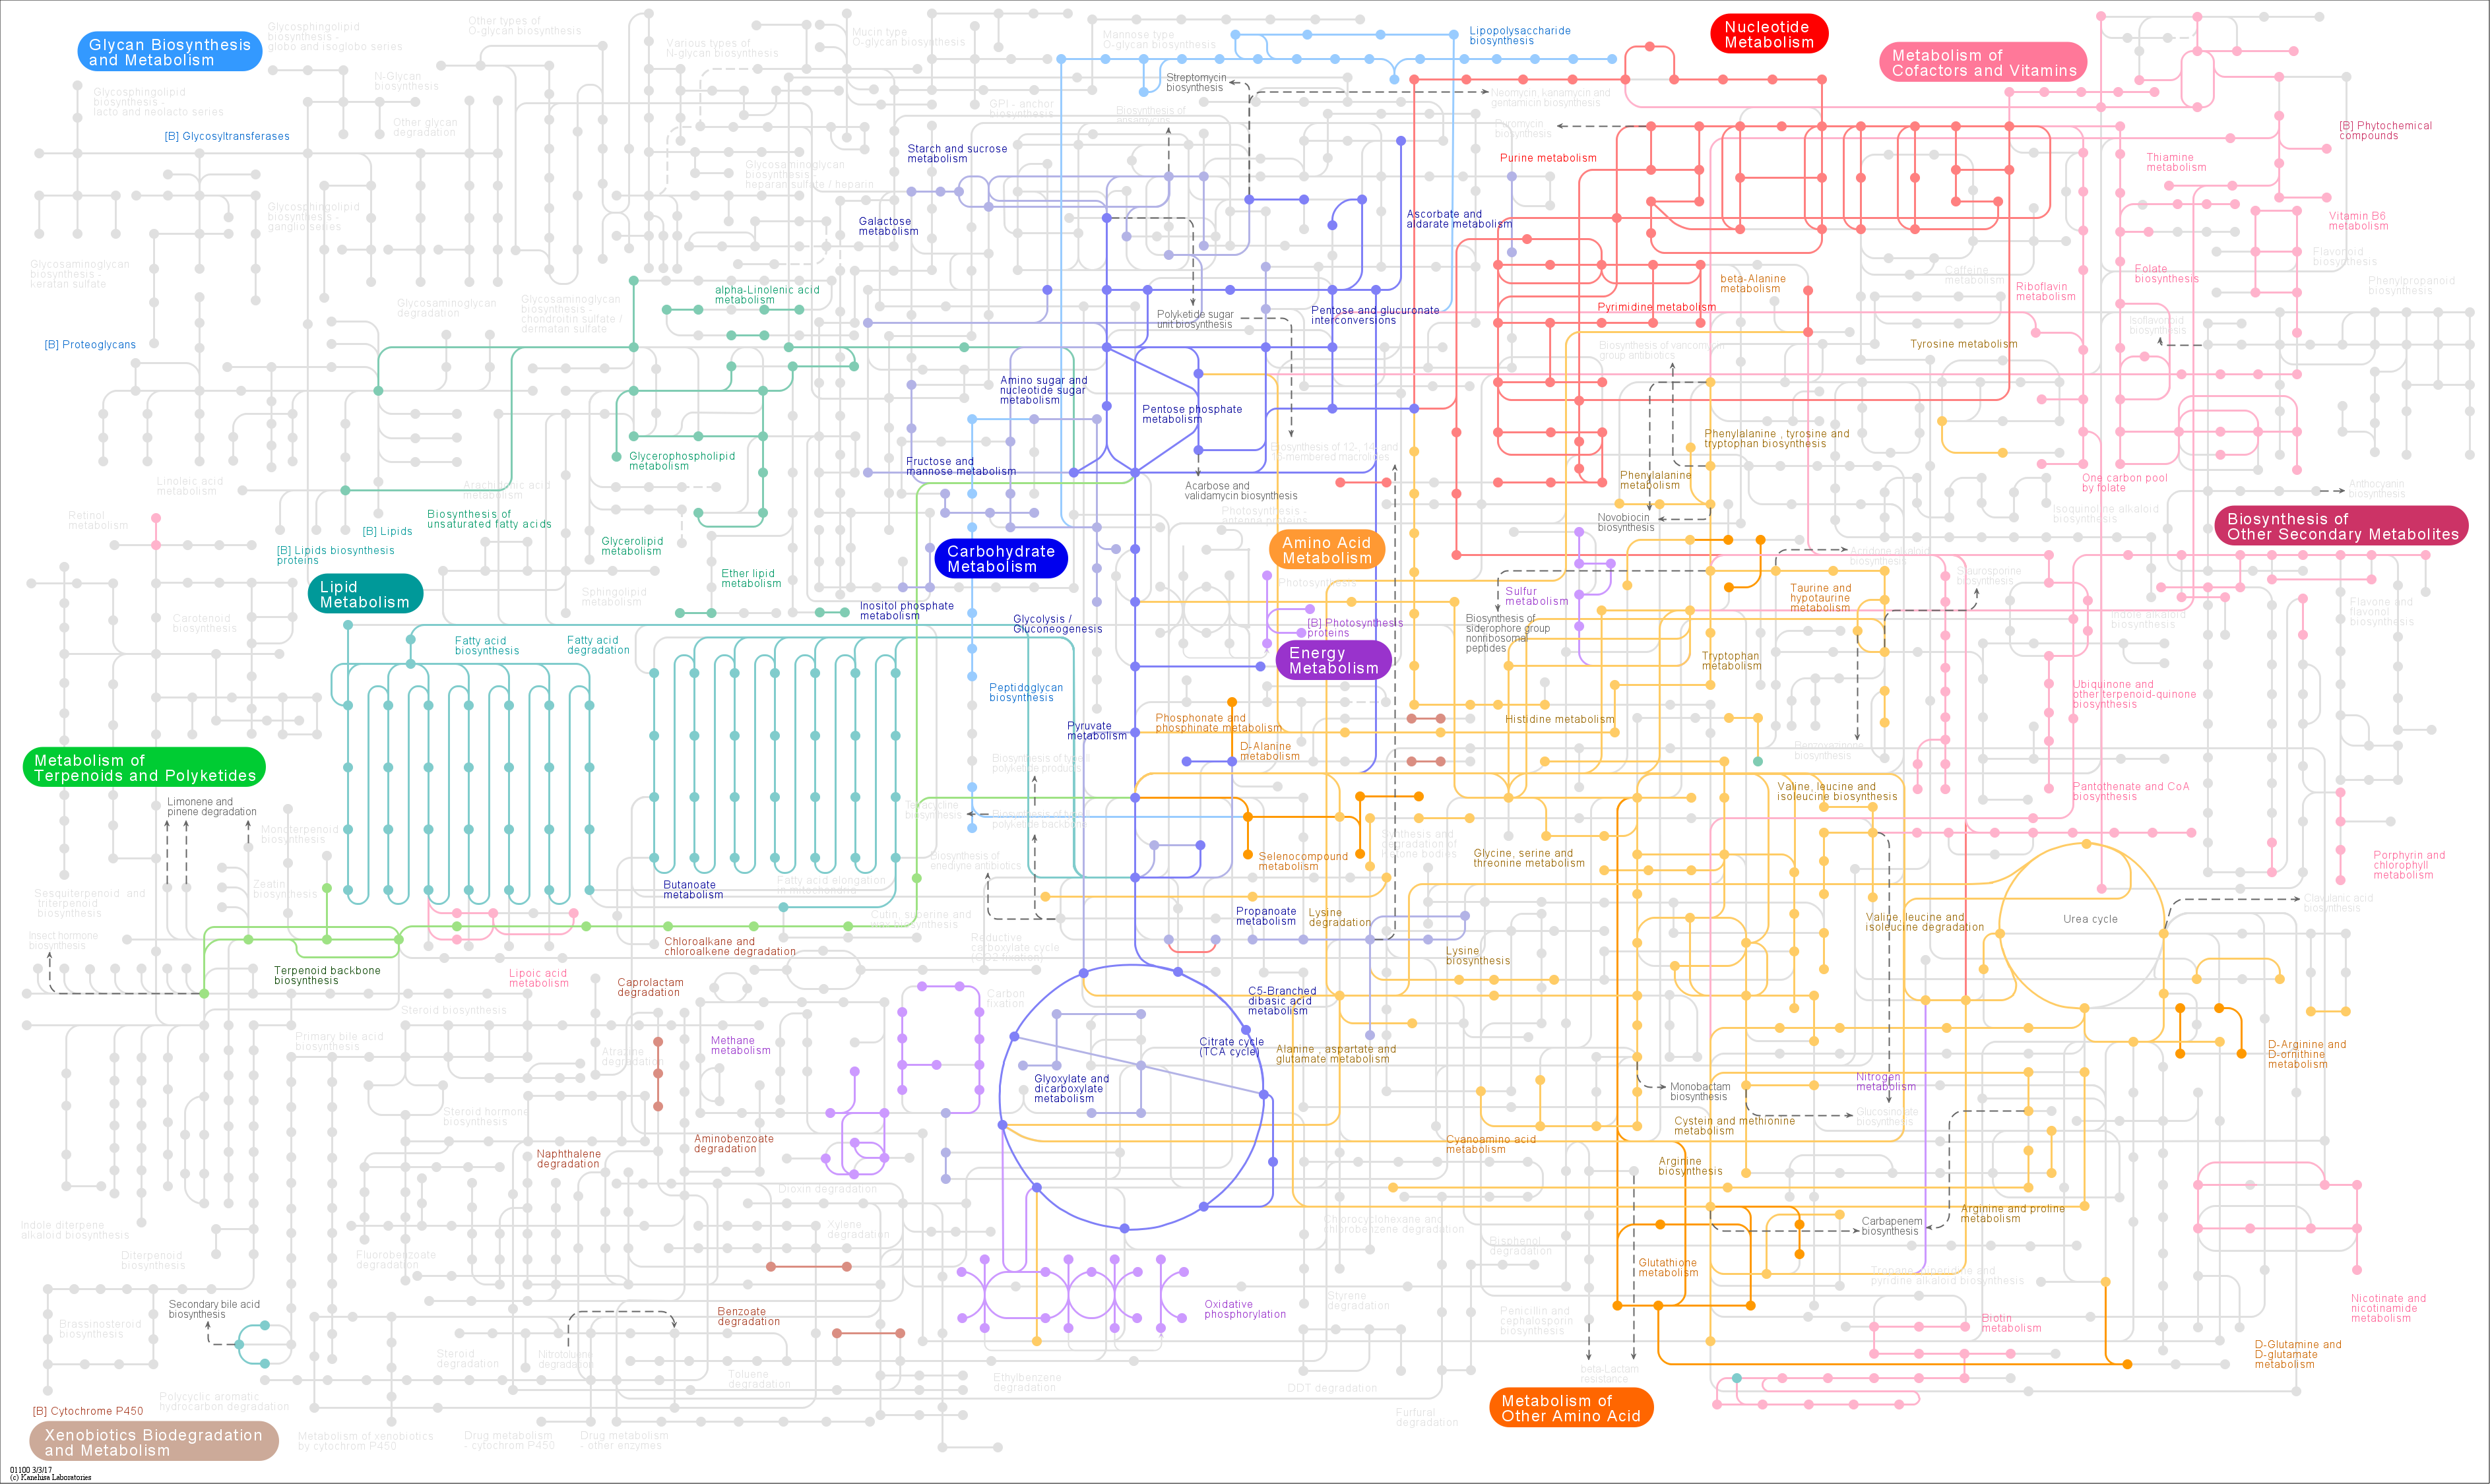

In [29]:
# Get the image for each path
pathway2img = REST.kegg_get("pmr01100", "image").read()
Image(pathway2img)

<div class="alert-success">
This lipase is involved in *P. mirabilis* central metabolism (`KEGG: pmr01100`), and specifically glycerolipid metabolism, where it converts between mono, di- and tri-acylglycerols, and fatty acids.
</div>

* **Ask the learners to identify sequences in the KEGG KO database corresponding to the wildtype lipase**

**Option 1: in the browser**

* Go to the KEGG KO page
* Enter the KEGG KO accession: K01046
* Follow the single link through to the KO group page
* Click on `show all` to see the large number of members of the orthologue group

* Go back to the KEGG KO page
* Enter the KEGG KO accession in the lower search box and select Ortholog Table

**Option 2: in the notebook**

In [30]:
# Show information about the KO group
ko_group = REST.kegg_get("K01046").read()
print(ko_group)

ENTRY       K01046                      KO
NAME        E3.1.1.3
DEFINITION  triacylglycerol lipase [EC:3.1.1.3]
PATHWAY     ko00561  Glycerolipid metabolism
MODULE      M00098  Acylglycerol degradation
BRITE       KEGG Orthology (KO) [BR:ko00001]
             Metabolism
              Lipid metabolism
               00561 Glycerolipid metabolism
                K01046  E3.1.1.3; triacylglycerol lipase
            KEGG modules [BR:ko00002]
             Pathway module
              Carbohydrate and lipid metabolism
               Lipid metabolism
                M00098  Acylglycerol degradation
                 K01046  E3.1.1.3; triacylglycerol lipase
            Enzymes [BR:ko01000]
             3. Hydrolases
              3.1  Acting on ester bonds
               3.1.1  Carboxylic-ester hydrolases
                3.1.1.3  triacylglycerol lipase
                 K01046  E3.1.1.3; triacylglycerol lipase
DBLINKS     RN: R02250 R02687
            COG: COG1075
            GO: 0004806
GENES  

In [31]:
# Get all individual genes that participate in the KO group
ko_members = REST.kegg_find("GENES", "K01046").read()
orthologues = to_df(ko_members)
print(len(orthologues))
orthologues.head()

1043


,0,1
0,hsa:9388,K01046 triacylglycerol lipase [EC:3.1.1.3] | (...
1,hsa:3990,K01046 triacylglycerol lipase [EC:3.1.1.3] | (...
2,ptr:746925,K01046 triacylglycerol lipase [EC:3.1.1.3] | (...
3,ptr:455413,K01046 triacylglycerol lipase [EC:3.1.1.3] | (...
4,pps:100977088,K01046 triacylglycerol lipase [EC:3.1.1.3] | (...


<div class="alert-success">
The *P. mirabilis* lipase is a member of the KEGG orthologue group `KO1046`, which contains 1043 members. There appears to be a large extent of diversity to draw upon for directed evolution and engineering experiments.
</div>

### 02d - Generate an orthologue/homologue set

Our goal here is to generate a multiple sequence file that contains known orthologues/homologues to the query sequence (in this case, the wildtype sequence). That can then be taken forward for sequence alignment, and other analyses.

The logic here is to use a `KEGG` result (the dataframe of KO group members), and combine all the returned accessions into a single string separated by `+`, then get the amino acid sequences.

* **Demonstrate to the learners how to take the ID column from the result above, and get the sequence of each**
* **There are too many IDs to combine into a valid URI**
* **We only get the first 90 orthologues to save time**

In [32]:
# Get protein sequences for the first 90 KO group members
with open(os.path.join("output", "kegg_orthologues.fasta"), "w") as ko_handle:
    for kegg_id in orthologues[0][:90]:
        result = REST.kegg_get(kegg_id, "aaseq").read()
        ko_handle.write(result)

* **Ask the learners to open Jalview and load in the `kegg_orthologues.fasta` file**
* **Ask the learners to submit an alignment job to a webservice**
* **Ask the learners to colour the Jalview representation and inspect the alignment to see sequence variation**
* **Ask the learners to save the alignment out as, e.g. `muscle_alignment.fasta` then close Jalview and inspect the file**

## 03 - Identifying related structural data

## 04 - Comparing engineered to wild-type sequence

## 05 - Generating a shareable document

Jupyter notebooks are flexible in terms of their output. This entire report can be saved as an `.html` file, readable in anyone's (modern browser), by selecting

```
File -> Download as… -> HTML
```

from the menu bar.

* **Ask the learners to try this, and send/show each other their reports as an .html file in their browser**